In [ ]:
# libraries
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [ ]:
supergenre = {
    'indie':['alternative','rock'],
    'alt-rock':['alternative','rock'],
    'punk':['alternative','rock'],
    'grunge':['alternative','rock','hardcore'],
    'punk-rock':['alternative','rock'],
    'indie-pop':'alternative',
    'emo':['alternative','rock'],
    'goth':['alternative','rock'],
    'death-metal':'hardcore',
    'grindcore':'hardcore',
    'black-metal':'hardcore',
    'heavy-metal':['hardcore','rock'],
    'metalcore':['hardcore','alternative'],
    'metal':['hardcore','rock'],
    'metal-misc':['hardcore','rock'],
    'electronic':'dance',
    'electro':'dance',
    'edm':'dance',
    'garage':'dance',
    'house':'dance',
    'chicago-house':'dance',
    'breakbeat':['dance','pop','jazz'],
    'dubstep':'dance',
    'techno':'dance',
    'j-dance':'dance',
    'deep-house':'dance',
    'ambient':'easy-listening',
    'chill':'easy-listening',
    'sleep':'easy-listening',
    'new-age':'easy-listening',
    'study':'easy-listening',
    'piano':['easy-listening','classical','rock','jazz'],
    'rock-n-roll':'rock',
    'rockabilly':['rock','country'],
    'j-rock':'rock',
    'hard-rock':'rock',
    'psych-rock':['rock','alternative'],
    'power-pop':['rock','pop'],
    'guitar':['rock','pop','jazz'],
    'drum-and-bass':['rock','jazz'],
    'bluegrass':'country',
    'acoustic':['country','easy-listening'],
    'folk':'country',
    'honky-tonk':['country','rock'],
    'k-pop':'pop',
    'j-pop':'pop',
    'cantopop':'pop',
    'party':['pop','rock'],
    'pop-film':['pop','musical'],
    'r-n-b':['pop','jazz'],
    'club':'pop',
    'soul':'jazz',
    'funk':'jazz',
    'blues':'jazz',
    'afrobeat':'jazz',
    'latino':'latin',
    'reggaeton':'latin',
    'samba':'latin',
    'salsa':'latin',
    'bossanova':['latin','jazz'],
    'opera':'classical',
    'disney':'musical',
    'show-tunes':'musical'
}

In [5]:
E1 = [
    'indie',
    'indie',
    'alt-rock',
    'alt-rock',
    'punk',
    'punk',
    'grunge',
    'grunge',
    'grunge',
    'punk-rock',
    'punk-rock',
    'indie-pop',
    'emo',
    'emo',
    'goth',
    'goth',
    'death-metal',
    'grindcore',
    'black-metal',
    'heavy-metal',
    'heavy-metal',
    'metalcore',
    'metalcore',
    'metal',
    'metal',
    'metal-misc',
    'metal-misc',
    'electronic',
    'electro',
    'edm',
    'garage',
    'house',
    'chicago-house',
    'breakbeat',
    'breakbeat',
    'breakbeat',
    'dubstep',
    'techno',
    'j-dance',
    'deep-house',
    'ambient',
    'chill',
    'sleep',
    'new-age',
    'study',
    'piano',
    'piano',
    'piano',
    'piano',
    'rock-n-roll',
    'rockabilly',
    'rockabilly',
    'j-rock',
    'hard-rock',
    'psych-rock',
    'psych-rock',
    'power-pop',
    'power-pop',
    'guitar',
    'guitar',
    'guitar',
    'drum-and-bass',
    'drum-and-bass',
    'bluegrass',
    'acoustic',
    'acoustic',
    'folk',
    'honky-tonk',
    'hinky-tonk',
    'k-pop',
    'j-pop',
    'cantopop',
    'party',
    'party',
    'pop-film',
    'pop-film',
    'r-n-b',
    'r-n-b',
    'club',
    'soul',
    'funk',
    'blues',
    'afrobeat',
    'latino',
    'reggaeton',
    'samba',
    'salsa',
    'bossanova',
    'bossanova',
    'opera',
    'disney',
    'show-tunes'
]

In [3]:
E2 = [
    'alternative',
    'rock',
    'alternative',
    'rock',
    'alternative',
    'rock',
    'alternative',
    'rock',
    'hardcore',
    'alternative',
    'rock',
    'alternative',
    'alternative',
    'rock',
    'alternative',
    'rock',
    'hardcore',
    'hardcore',
    'hardcore',
    'hardcore',
    'rock',
    'hardcore',
    'alternative',
    'hardcore',
    'rock',
    'hardcore',
    'rock',
    'dance',
    'dance',
    'dance',
    'dance',
    'dance',
    'dance',
    'dance',
    'pop',
    'jazz',
    'dance',
    'dance',
    'dance',
    'dance',
    'easy-listening',
    'easy-listening',
    'easy-listening',
    'easy-listening',
    'easy-listening',
    'easy-listening',
    'classical',
    'rock',
    'jazz',
    'rock',
    'rock',
    'country',
    'rock',
    'rock',
    'rock',
    'alternative',
    'rock',
    'pop',
    'rock',
    'pop',
    'jazz',
    'rock',
    'jazz',
    'country',
    'country',
    'easy-listening',
    'country',
    'country',
    'rock',
    'pop',
    'pop',
    'pop',
    'pop',
    'rock',
    'pop',
    'musical',
    'pop',
    'jazz',
    'pop',
    'jazz',
    'jazz',
    'jazz',
    'jazz',
    'latin',
    'latin',
    'latin',
    'latin',
    'latin',
    'jazz',
    'classical',
    'musical',
    'musical' 

]

In [6]:
print(len(E1))
print(len(E2))

92
92


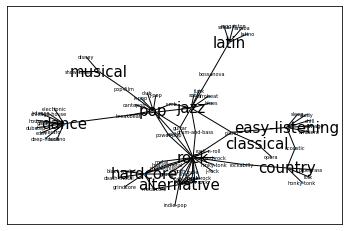

In [52]:
# Build a dataframe with your connections
df = pd.DataFrame({ 'from':E1, 'to':E2})
super = list(set(E2))
sub = list(set(E1))
All = super + sub
values = np.zeros(len(super)+len(sub))
values[:len(super)-1] = 100
values = np.abs(100 - values)
carac = pd.DataFrame({ 'ID':All, 'myvalue':values })
 
G=nx.from_pandas_edgelist(df, 'from', 'to', create_using=nx.Graph() )
 
G.nodes()

carac= carac.set_index('ID')
carac=carac.reindex(G.nodes())
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G,pos,node_size=1)

# Plot it, providing a continuous color scale with cmap:
plt.figure(1,figsize=(10,10))
supergenres = G.subgraph(super)
subgenres = G.subgraph(sub)
# draw on the labels with different fonts
nx.draw_networkx_labels(supergenres,pos,font_size=15)
nx.draw_networkx_labels(subgenres,pos,font_size=5)
nx.draw_networkx_edges(G,pos)

#nx.draw(G, with_labels=True, node_color=carac['myvalue'].astype(int), cmap=plt.cm.Blues,font_size=10)
plt.show()

In [ ]:
plt.savefig("Graph.png", dpi=1000)